In [1]:
# Importing important libraries for the project

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the prices data
df = pd.read_csv(r'C:\Users\Hp\Documents\Project Data info\NYSE Stock Price Prediction\prices.csv')

In [3]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
# data file size
df.shape

(851264, 7)

In [5]:
# We analyze the first 20 company names (or symols) from the data
df.symbol.unique()[:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [6]:
# We give a brief dsscription on the whole dataset
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
# We check for the presence of null values
df.isnull().sum()
# There is no null value in the data. It makes the data suitable for machine learning algorithms

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
# taking all the unique or one time value in the date column
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [9]:
# Loading the securities data
company_info = pd.read_csv(r'C:\Users\Hp\Documents\Project Data info\NYSE Stock Price Prediction\securities.csv')

In [10]:
company_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [11]:
# Number of companies
company_info['Ticker symbol'].unique().shape

(505,)

In [12]:
# we locate ticker symbol of company with security like Yahoo, Xeros, Adobe etc
comp_plot = company_info.loc[(company_info['Security'] == 'Yahoo Inc.') | (company_info['Security'] == 'Xerox Corp.')
                             | (company_info['Security'] == 'Microsoft Corp.') | (company_info['Security'] == 'Facebook')
                             | (company_info['Security'] == 'Goldman Sachs Group'), ['Ticker symbol']]['Ticker symbol']

In [13]:
print(comp_plot)

181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


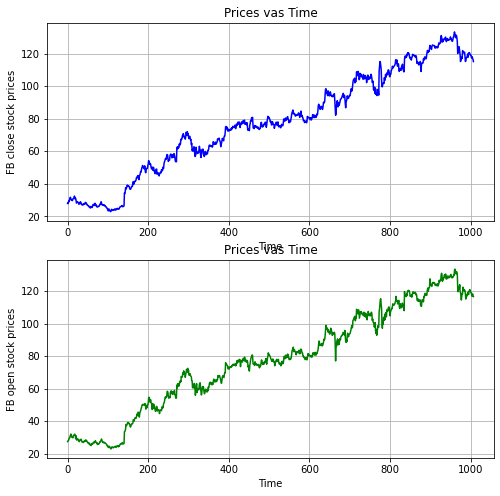

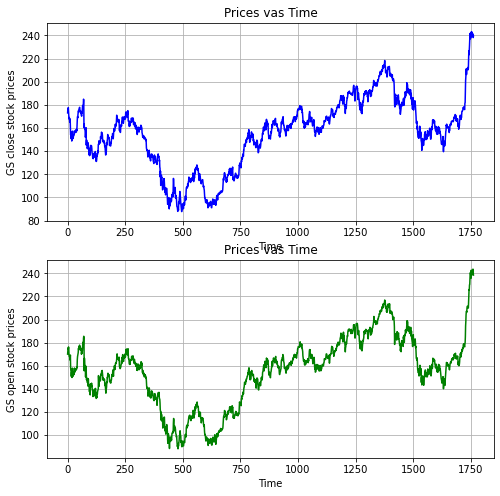

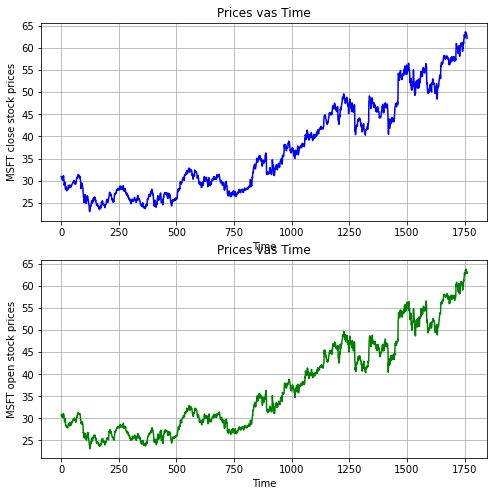

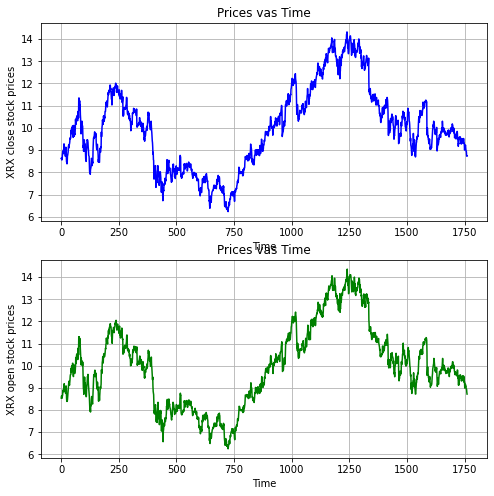

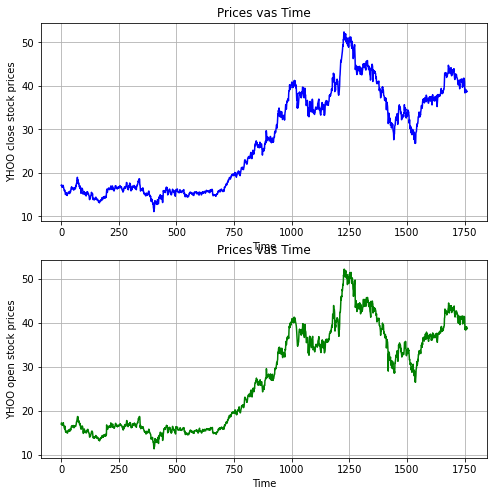

In [14]:
# Visualizing stock prices with respect to time
def plotter(code):
    global closing_stock, opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['symbol'] == code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1,1)
    opening_stock = company
    
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel(code + " open stock prices")
    plt.title('Prices vas Time')
    plt.plot(company, 'g')
    plt.subplot(211)
    
    company_close = df[df["symbol"] == code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1,1)
    closing_stock = company_close
    
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel(code + " close stock prices")
    plt.title('Prices vas Time')
    plt.plot(company_close, 'b')
    plt.show()
    
# We call the graph
for i in comp_plot:
    plotter(i)

In [15]:
# we convert the closing stock into a list
closing_stock[:,0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [16]:
stocks = closing_stock[:,0]
print(stocks)
# reshaping the stocks into  1D array
stocks = stocks.reshape(len(stocks), 1)


[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [17]:
# feature scaling for better model performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) #Scaling feautres bewtween 1 and 0
stocks = scaler.fit_transform(stocks)

In [18]:
# Sepearating train and test set
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [19]:
print(train, test)

1409 353


In [20]:
train = stocks[0:train]
print(train.shape)

(1409, 1)


In [21]:
test = stocks[len(train):]
test.shape

(353, 1)

In [22]:
def process(data, n_features):
    dataX,dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i + n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
        
    return np.array(dataX), np.array(dataY)

In [29]:
# We create train and test set using the process function

n_features = 2
trainX, trainY = process(train, n_features)
testX, testY = process(test, n_features)


In [30]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [32]:
# reshaping trainX and testX to use in deeplearning model
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

In [33]:
# Model building phase

# We import all the libraries needed

In [36]:
import math
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam, SGD, RMSprop

In [41]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [44]:
filepath = r"C:\Users\Hp\Documents\GitHub\NYSE-Stock-Price-Prediction\stock-weight.hdf5"

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='max')

In [45]:
model = Sequential()

model.add(GRU(256, input_shape=(1, n_features), return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 256)            199680    
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 741,505
Trainable params: 741,505
Non-trainable params: 0
__________________________________________________

In [47]:
# selecting the loss measurement metrics
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0005), metrics=['mean_squared_error'])

In [49]:
# fitting the data
history = model.fit(trainX, trainY, epochs=100, batch_size=128,
                   callbacks=[checkpoint, lr_reduce], validation_data=(testX, testY))

Epoch 1/100
10/11 [==========================>...] - ETA: 0s - loss: 0.1611 - mean_squared_error: 0.1611
Epoch 00001: val_loss improved from -inf to 0.20367, saving model to C:\Users\Hp\Documents\GitHub\NYSE-Stock-Price-Prediction\stock-weight.hdf5
11/11 [==============================] - 2s 218ms/step - loss: 0.1540 - mean_squared_error: 0.1540 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00002: val_loss did not improve from 0.20367
11/11 [==============================] - 0s 29ms/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 3/100
 9/11 [=======================>......] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00003: val_loss did not improve from 0.20367
11/11 [==============================] - 0s 27ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0012 - val_mean_squared_er

In [50]:
#predicting the value for textX
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)

pred[:10]

array([[33.146732],
       [32.16215 ],
       [32.153145],
       [32.787197],
       [32.845715],
       [32.64034 ],
       [32.304314],
       [31.714485],
       [30.88614 ],
       [29.865095]], dtype=float32)

In [51]:
testY = testY.reshape(testY.shape[0], 1)

testY = scaler.inverse_transform(testY)

testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red - Predicted stock Prices, Blue - Actual Stock Prices


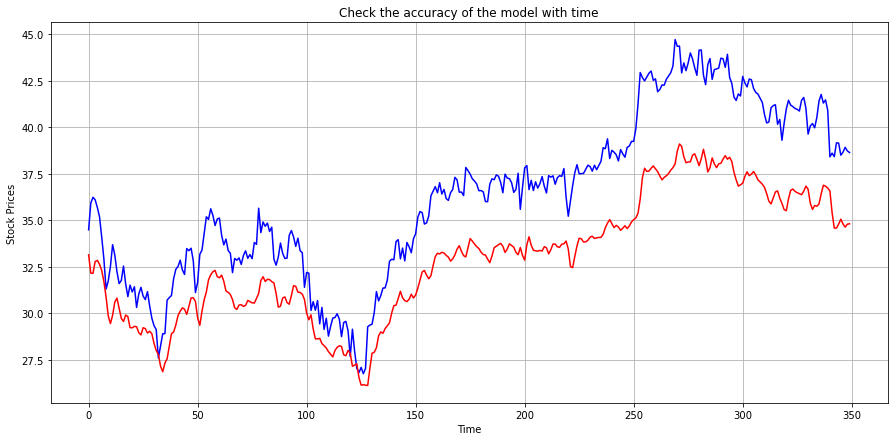

In [52]:
# plotting the graph of stock prices with time
print("Red - Predicted stock Prices, Blue - Actual Stock Prices")

plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY, 'b')

plt.plot(pred, 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')

plt.grid(True)

plt.show()

In [53]:
# The model is working correctly because the plots are close to each other and not overfitting